# Diabetes case study - Using Sklearn and Grid Search to evaluate and optimize models

This notebook is a case study for practicing the use of both Sklearn and Grid Search on model evaluation and optimization. 

<br>

The dataset used is the Pima Indias Diabetes dataset (https://www.kaggle.com/uciml/pima-indians-diabetes-database). <br>

<br>

Models used in this notebook :
* Support Vector Machine
* Random Forest Classifier
* Ada Boost Classifier


### Imports

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

### Load dataset

In [8]:
dataset = pd.read_csv('../dataset/diabetes_dataset')

### Dataset initial analyzes

In [9]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### Dataset distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122d4f4a8>,
      dtype=object)

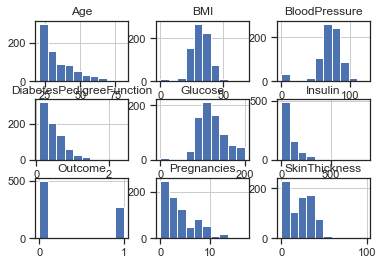

In [10]:
dataset.hist()

#####  Features pair realtion

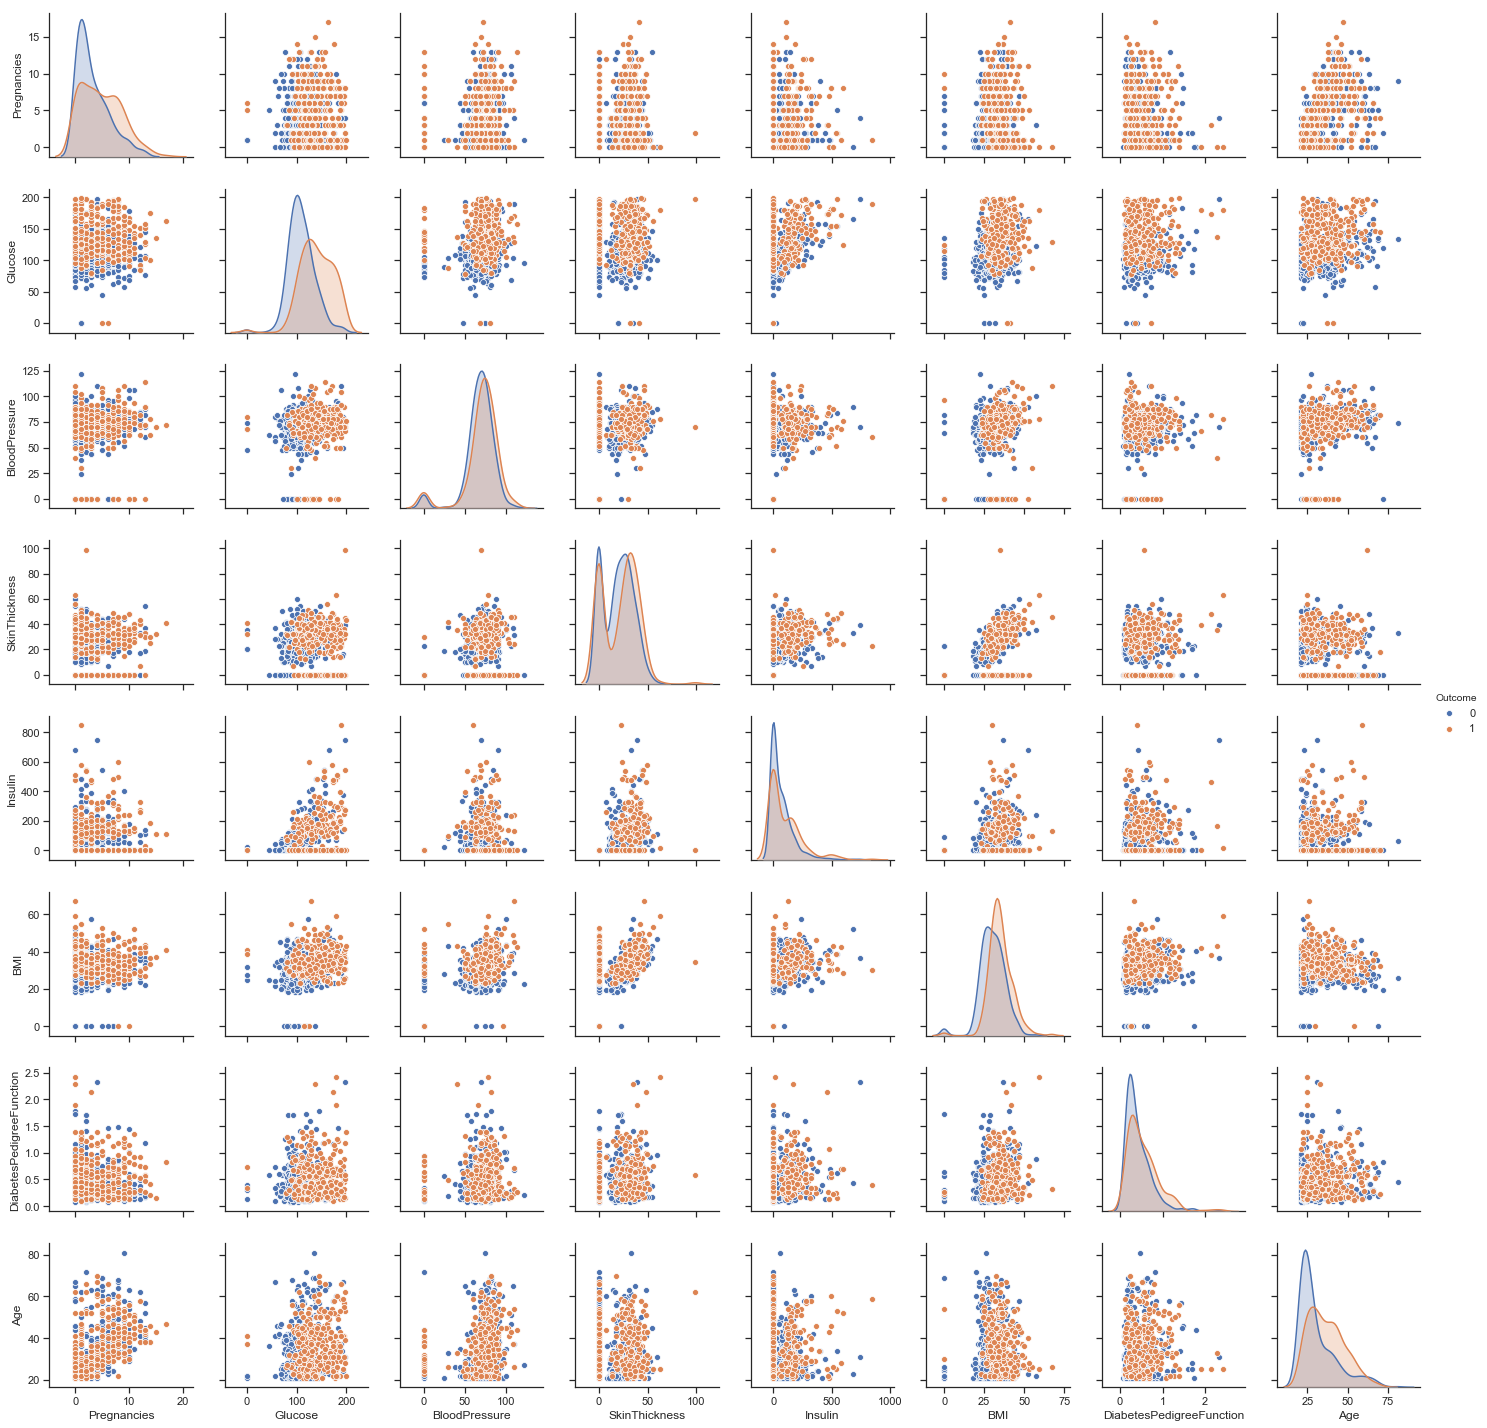

In [13]:
sns.pairplot(dataset, vars=dataset.columns[:-1], hue="Outcome")

##### Features correlation

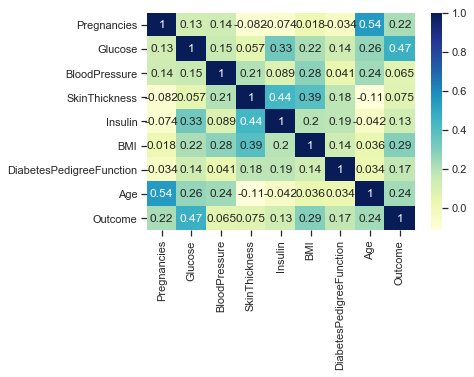

In [18]:
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')

### Split dataset

In [23]:
# Separate features and label
X = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Build models and randomized grid search

In [30]:
# Create models
rf_model = RandomForestClassifier()
ada_model = AdaBoostClassifier()
svm_model = SVC(gamma='auto')

# Model parameters for randomized grid search
rf_params = {"max_depth": [3, None],
             "n_estimators": list(range(10, 200)),
             "max_features": list(range(1, X_test.shape[1]+1)),
             "min_samples_split": list(range(2, 11)),
             "min_samples_leaf": list(range(1, 11)),
             "bootstrap": [True, False],
             "criterion": ["gini", "entropy"]}

ada_params = {"n_estimators": [10, 100, 200, 400],
             "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}

svm_params = {"C": [0.1, 0.5, 1, 3, 5],
             "kernel": ['linear', 'rbf']}

# Randomized search
rf_random_search = RandomizedSearchCV(rf_model, param_distributions=rf_params)
ada_random_search = RandomizedSearchCV(ada_model, param_distributions=ada_params)
svm_random_search = RandomizedSearchCV(svm_model, param_distributions=svm_params)

# Fit randomized model to the data
rf_random_search.fit(X_train, y_train)
ada_random_search.fit(X_train, y_train)
svm_random_search.fit(X_train, y_train)

# Make predictions
rf_preds = rf_random_search.best_estimator_.predict(X_test)
ada_preds = ada_random_search.best_estimator_.predict(X_test)
svm_preds = svm_random_search.best_estimator_.predict(X_test)

# Print results
def print_metrcis(y_test, model_preds, model_name):
    print("Accuracy Score for {} : {}".format(model_name, accuracy_score(y_test, model_preds)))
    print("Precision Score for {} : {}".format(model_name, precision_score(y_test, model_preds)))
    print("Recall Score for {} : {}".format(model_name, recall_score(y_test, model_preds)))
    print("F1 Score for {} : {}".format(model_name, f1_score(y_test, model_preds)))
    print("\n\n")

print_metrcis(y_test, rf_preds, "Random Forest")
print_metrcis(y_test, ada_preds, "Ada Boost")
print_metrcis(y_test, svm_preds, "SVM")


/Users/lajosneto/.pyenv/versions/3.7.2/envs/fullml/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/lajosneto/.pyenv/versions/3.7.2/envs/fullml/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/lajosneto/.pyenv/versions/3.7.2/envs/fullml/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy Score for Random Forest : 0.7597402597402597
Precision Score for Random Forest : 0.65
Recall Score for Random Forest : 0.7090909090909091
F1 Score for Random Forest : 0.6782608695652174



Accuracy Score for Ada Boost : 0.7597402597402597
Precision Score for Ada Boost : 0.6551724137931034
Recall Score for Ada Boost : 0.6909090909090909
F1 Score for Ada Boost : 0.6725663716814159



Accuracy Score for SVM : 0.7532467532467533
Precision Score for SVM : 0.6545454545454545
Recall Score for SVM : 0.6545454545454545
F1 Score for SVM : 0.6545454545454545



